In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pickle

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `breast-cancer.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("Resources/breast-cancer.csv")

# Review the DataFrame
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# use get_dummies to encode diagnosis
df = pd.get_dummies(df)
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,1


In [4]:
# drop diagnosis_B and leave diagnosis_M to be used as target
df = df.drop(columns=['diagnosis_B']).set_index('id')
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1


In [5]:
# how many null values in the dataframe
df.isnull().sum().sum()

0

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>,
        <AxesSubplot:title={'center':'compactness_mean'}>],
       [<AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>],
       [<AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concave

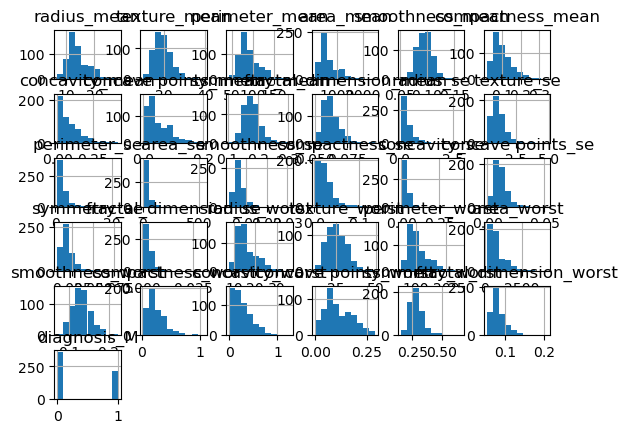

In [7]:
df.hist()

### Step 2: Create the labels set (`y`)  from the “diagnosis_M” column, and then create the features (`X`) DataFrame from the remaining columns.

In [8]:
# Separate the data into labels and features

# Separate the y variable, the labels
target = df["diagnosis_M"]
target_names = ["benign", "malignant"]

# Separate the X variable, the features
data = df.drop("diagnosis_M", axis=1)
feature_names = data.columns


In [9]:
# Review the y variable Series
target.head()

id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
Name: diagnosis_M, dtype: uint8

In [10]:
# Review the X variable DataFrame
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [11]:
# Check the balance of our target values
target.value_counts()

0    357
1    212
Name: diagnosis_M, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [12]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [13]:
# scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
pickle.dump(X_scaler, open("scaler_lr.pkl","wb"))
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = classifier.fit(X_train_scaled, y_train)

# dump model to pkl
pickle.dump(lr_model, open("lr_model.pkl","wb"))

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test_scaled`) and the fitted model.

In [15]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
id,,
906564,0,0
85715,1,1
891670,0,0
874217,1,1
905680,1,1
...,...,...
88203002,0,0
905557,1,0
91594602,1,1


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [16]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import balanced_accuracy_score
ba_score = balanced_accuracy_score(y_test, predictions)
print(f'The balanced_accuracy_score is {ba_score}.')

The balanced_accuracy_score is 0.9761363636363636.


In [17]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[87,  1],
       [ 2, 53]])

In [18]:
# Print the classification report for the model
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

      benign       0.98      0.99      0.98        88
   malignant       0.98      0.96      0.97        55

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



---

## Predict a Logistic Regression Model with Fewer Features

In [19]:
# Separate the X variables, the features
data2 = df.drop(["diagnosis_M","compactness_worst","texture_worst","texture_mean","perimeter_se","compactness_mean","smoothness_worst",
"fractal_dimension_worst","symmetry_worst","smoothness_mean","concave points_se","concavity_se","texture_se","compactness_se",
"fractal_dimension_se","symmetry_se","fractal_dimension_mean","symmetry_mean","smoothness_se","perimeter_mean","area_se",
"area_mean","radius_mean","radius_se",'concavity_mean','concave points_worst'], axis=1)
feature_names2 = data2.columns
feature_names2

Index(['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst'],
      dtype='object')

In [27]:
data2

,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst
id,,,,,
842302,0.14710,25.380,184.60,2019.0,0.7119
842517,0.07017,24.990,158.80,1956.0,0.2416
84300903,0.12790,23.570,152.50,1709.0,0.4504
84348301,0.10520,14.910,98.87,567.7,0.6869
84358402,0.10430,22.540,152.20,1575.0,0.4000
...,...,...,...,...,...
926424,0.13890,25.450,166.10,2027.0,0.4107
926682,0.09791,23.690,155.00,1731.0,0.3215
926954,0.05302,18.980,126.70,1124.0,0.3403


In [20]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(data2, target, random_state=1)

In [21]:
scaler2 = StandardScaler()
X_scaler2 = scaler2.fit(X_train)
pickle.dump(X_scaler2, open("scaler_lr2.pkl","wb"))
X_train_scaled = X_scaler2.transform(X_train)
X_test_scaled = X_scaler2.transform(X_test)

In [22]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier2 = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model2 = classifier2.fit(X_train_scaled, y_train)

# dump model to pkl
pickle.dump(lr_model2, open("lr_model_2.pkl","wb"))

In [23]:
# Make a prediction using the testing data
predictions = classifier2.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
id,,
906564,1,0
85715,1,1
891670,0,0
874217,1,1
905680,0,1
...,...,...
88203002,0,0
905557,0,0
91594602,1,1


In [24]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import balanced_accuracy_score
ba_score = balanced_accuracy_score(y_test, predictions)
print(f'The balanced_accuracy_score is {ba_score}.')

The balanced_accuracy_score is 0.9375.


In [25]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[85,  3],
       [ 5, 50]])

In [26]:
# Print the classification report for the model
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

      benign       0.94      0.97      0.96        88
   malignant       0.94      0.91      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

